# Praca domowa 6
## Andrzej Pióro, Jan Kruszewski

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Wczytujemy dane

In [2]:
df = pd.read_csv('heart.csv')
df

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


#### Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    object 
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 36.2+ KB


Nasza ramka danych nie posiada braków danych.

In [4]:
np.unique(df['chd'])

array([0, 1], dtype=int64)

In [5]:
np.unique(df['famhist'])

array(['Absent', 'Present'], dtype=object)

Mamy 10 zmiennych z czego tylko zmienna `famhist` nie jest zmienną liczbową. Przyjmuje ona jednak tylko 2 wartości. Przetransformujmy ją więc na zmienną binarną. Pozostałe zmienne są zmiennymi ciągłymi poza `chd`, która również jest binarna.

In [6]:
df['famhist'] = df['famhist'].replace({'Absent':0, 'Present':1})

#### Wykres korealcji

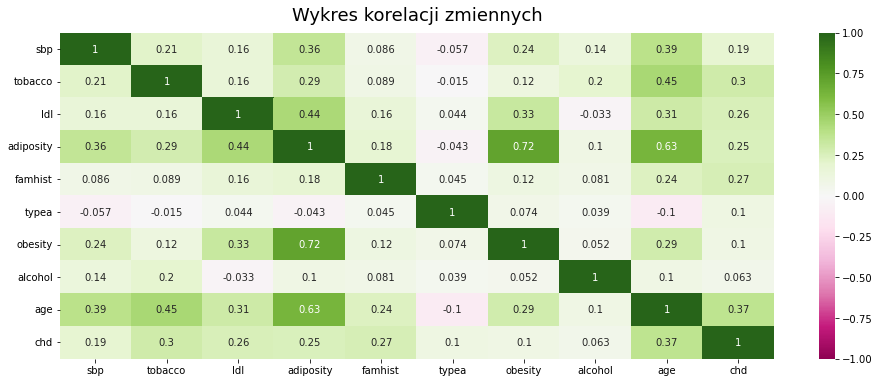

In [7]:
plt.figure(figsize=(16, 6))
heatmap=sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap="PiYG");
heatmap.set_title('Wykres korelacji zmiennych', fontdict={'fontsize':18}, pad=12);

W naszej ramce danych mamy 2 pary zmiennych dosyć mocno skorelowanych. Są to zmienne `obesity` i `adiposity` oraz `age` i `adiposity`.

#### Standaryzacja

In [8]:
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(df.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)
scaled_features_df

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1.058564,1.823073,0.478412,-0.295503,1.185854,-0.418470,-0.176786,3.277738,0.629336,1.373863
1,0.277089,-0.790237,-0.159680,0.412140,-0.843274,0.193344,0.671373,-0.612745,1.383115,1.373863
2,-0.992806,-0.774980,-0.609245,0.884332,1.185854,-0.112563,0.735519,-0.541183,0.218184,-0.727875
3,1.546985,0.842264,0.807126,1.624141,1.185854,-0.214532,1.412621,0.295062,1.040488,1.373863
4,-0.211332,2.171805,-0.599577,0.305351,1.185854,0.703189,-0.012856,1.647775,0.423760,1.373863
...,...,...,...,...,...,...,...,...,...,...
457,3.696039,-0.705234,0.599263,0.812281,-0.843274,1.111065,0.571590,-0.696983,1.040488,-0.727875
458,2.133091,0.123004,-0.159680,0.861173,-0.843274,-0.112563,0.609602,0.068519,0.629336,1.373863
459,-1.481228,-0.138545,-1.522877,-1.309364,-0.843274,-1.336191,-1.414575,0.392385,0.834912,-0.727875
460,-0.992806,0.384553,3.320823,0.692625,-0.843274,1.111065,0.310252,0.283203,-0.192969,-0.727875


### Biplot

Zastosujmy PCA dla naszego zbioru. Sprawdźmy ile pierwszych głównych składowych zawiera większość wariancji obecnej w wyjściowym zbiorze.

In [9]:
from sklearn.decomposition import PCA
pca = PCA().fit(scaled_features_df)
np.cumsum(pca.explained_variance_ratio_)

array([0.30864655, 0.43171326, 0.54633428, 0.64832292, 0.73556835,
       0.81233184, 0.87960936, 0.93700627, 0.98251794, 1.        ])

<BarContainer object of 10 artists>

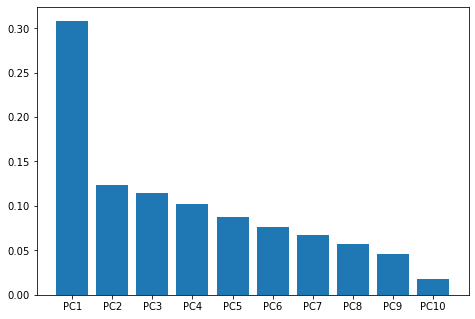

In [10]:
pc_names = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(pc_names, pca.explained_variance_ratio_)

5 pierwszych komponentów zawiera około 73,6% całkowitej wariancji. Widać, że zdecydowanie najwięcej wariancji niesie za sobą 1. komponent.

#### Wartości własne

Teraz przyjrzyjmy się wartością własnym dla kolejnych głównych komponentów.

In [11]:
pca.explained_variance_

array([3.09316061, 1.23333668, 1.14869663, 1.02209866, 0.87434685,
       0.76930002, 0.67423459, 0.5752142 , 0.45610395, 0.17519979])

Pierwsze 4 komponenty posiadają wartości własne o wartości większej niż 1. Wnoszą więc również większą wariancję.

#### Wektory własne

Wartości wektorów własnych. Wartości wektora własnego oznaczają współczynniki korelacji pomiędzy oryginalnymi zmiennymi a głównymi komponentami.

In [12]:
corr_coef = pca.components_
num_pc = pca.n_features_
corr_coef_df = pd.DataFrame.from_dict(dict(zip(pc_names, corr_coef)))
corr_coef_df['zmienna'] = scaled_features_df.columns.values
corr_coef_df = corr_coef_df.set_index('zmienna')
corr_coef_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
zmienna,,,,,,,,,,
sbp,0.306354,0.079621,-0.304567,0.101147,0.000665,0.818800,0.198138,-0.207390,0.209550,-0.014193
tobacco,0.303267,0.424684,-0.155814,0.009734,0.422825,-0.341577,-0.305815,-0.359747,0.427324,-0.047940
ldl,0.324056,-0.274112,0.248650,-0.164197,0.126205,-0.252048,0.714845,-0.367461,0.020774,0.071725
adiposity,0.481140,-0.307111,-0.093442,0.099940,-0.060253,-0.096738,-0.148810,0.144787,-0.159888,-0.757501
famhist,0.207459,0.225550,0.411099,-0.247616,-0.727815,0.030297,-0.215037,-0.283716,0.132527,-0.028988
typea,-0.001496,0.021824,0.683272,0.520783,0.315653,0.231459,-0.172006,-0.192190,-0.200129,-0.040744
obesity,0.361037,-0.497441,0.014716,0.306996,-0.124219,-0.088234,-0.239038,0.234507,0.371810,0.504134
alcohol,0.115337,0.448464,-0.168701,0.647994,-0.333054,-0.256188,0.362347,0.130150,-0.106458,0.033114
age,0.448790,0.128553,-0.156603,-0.180948,0.076865,0.008036,-0.201324,-0.058254,-0.717006,0.400999


Dodatnie i ujemne wartości odzwierciedlają dodatnie i ujemne skorelowanie głównych składowych ze zmiennymi.

#### Biplot

Teraz stworzymy 2 biploty. Pierwszy dla 2 wymiarów (PC1 i PC2) oraz drugi dla 3 wymierów (PC1, PC2, PC3).

In [13]:
#!pip install bioinfokit

##### 2 wymiary

Note: you may need to restart the kernel to use updated packages.


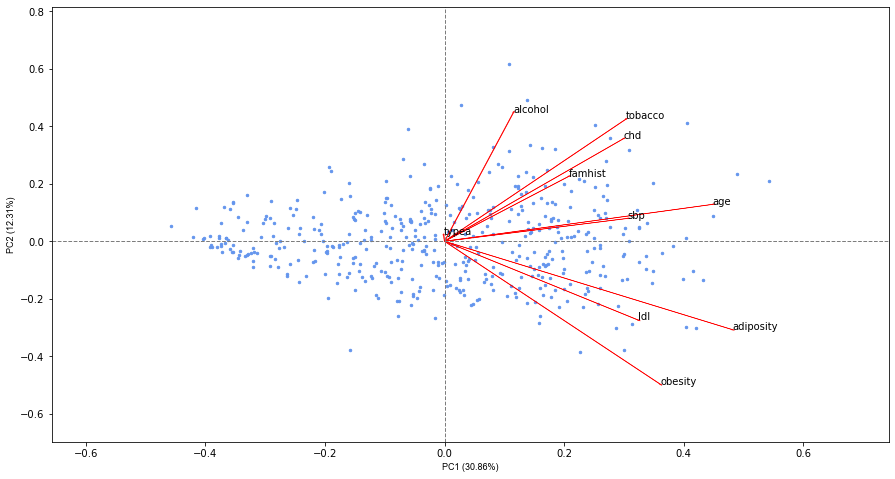

In [14]:
%pip install bioinfokit
from bioinfokit.visuz import cluster
pca_sc= PCA().fit_transform(scaled_features_df)
cluster.biplot(cscore=pca_sc, loadings=corr_coef, labels=scaled_features_df.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2), colordot = 'cornflowerblue', show=True, arrowcolor= 'red', dim=(15,8))


Gdy zmienne są mocno powiązane, kąt pomiędzy wektorami je oznaczającymi jest mały. Widzimy, że zmienne `age` i `sbp` są mocno powiązane. Tak samo zmienne `famhist` i `chd` czy zmienne `adiposity` i `ldl`. Zmienne te potencjalnie mogą formować różne klastry.

##### 3 wymiary

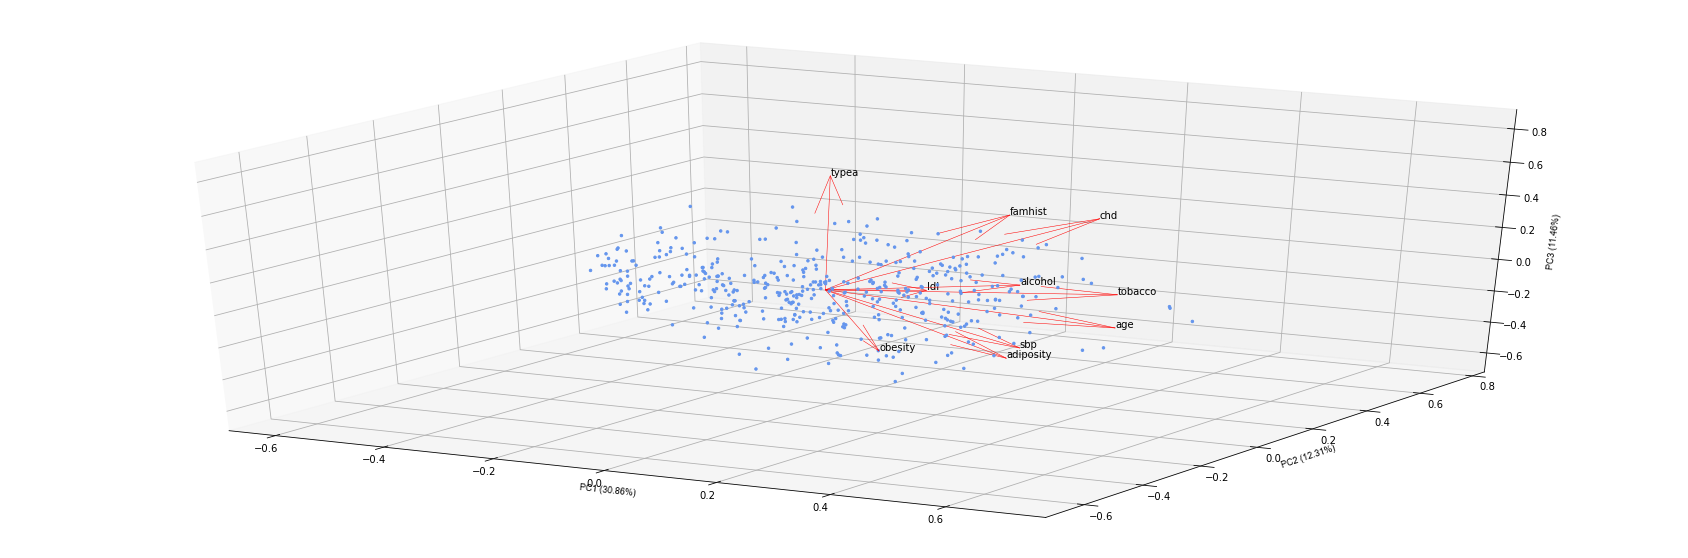

In [15]:
cluster.biplot(cscore=pca_sc, loadings=corr_coef, labels=scaled_features_df.columns.values, 
    var1=round(pca.explained_variance_ratio_[0]*100, 2), var2=round(pca.explained_variance_ratio_[1]*100, 2), 
    var3=round(pca.explained_variance_ratio_[2]*100, 2), colordot = 'cornflowerblue', show=True, arrowcolor= 'red',dim=(30,10))

#### Ostateczne PCA dla 5 komponentów

In [16]:
pca_final = PCA(n_components=5)
principalComponents = pca_final.fit_transform(scaled_features_df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])
principalDf

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,2.144487,3.205643,-0.429942,1.088973,-0.891844
1,1.020159,-0.522892,0.125104,-0.415968,0.797768
2,0.018283,-1.088082,0.411928,-0.239083,-1.397138
3,3.440847,0.077397,0.078012,-0.146299,-0.488475
4,1.578226,2.549123,0.654283,0.816433,-0.056731
...,...,...,...,...,...
457,1.701933,-1.307852,-0.822786,0.869835,0.790863
458,1.800198,0.107493,-0.831240,0.225100,0.784364
459,-2.100816,1.150583,-1.516633,-0.653033,-0.017344
460,0.885488,-1.516618,1.147332,0.725467,1.210415


## Podsumowanie 

Ostatecznie do PCA wybieramy 5 pierwszych komponentów. Jest to najlepszy wybór ponieważ:
- Zawierają one większość całkowitej wariancji - około 73,6%. Stanowią zatem dobre przybliżenie orginalnego zbioru zawierającego 10 zmiennych.
- Wartości własne odpowiadające pierwszym czterem składowym mają wartość większą niż 1, co za tym idzie wnoszą większą wariancję. Wartość ta dla PC5 to około 0.87.
    

# Walidacja

walidacje wykonali:
- Gut Szymon
- Jan Krężel

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002951CDB2340>,
      dtype=object)

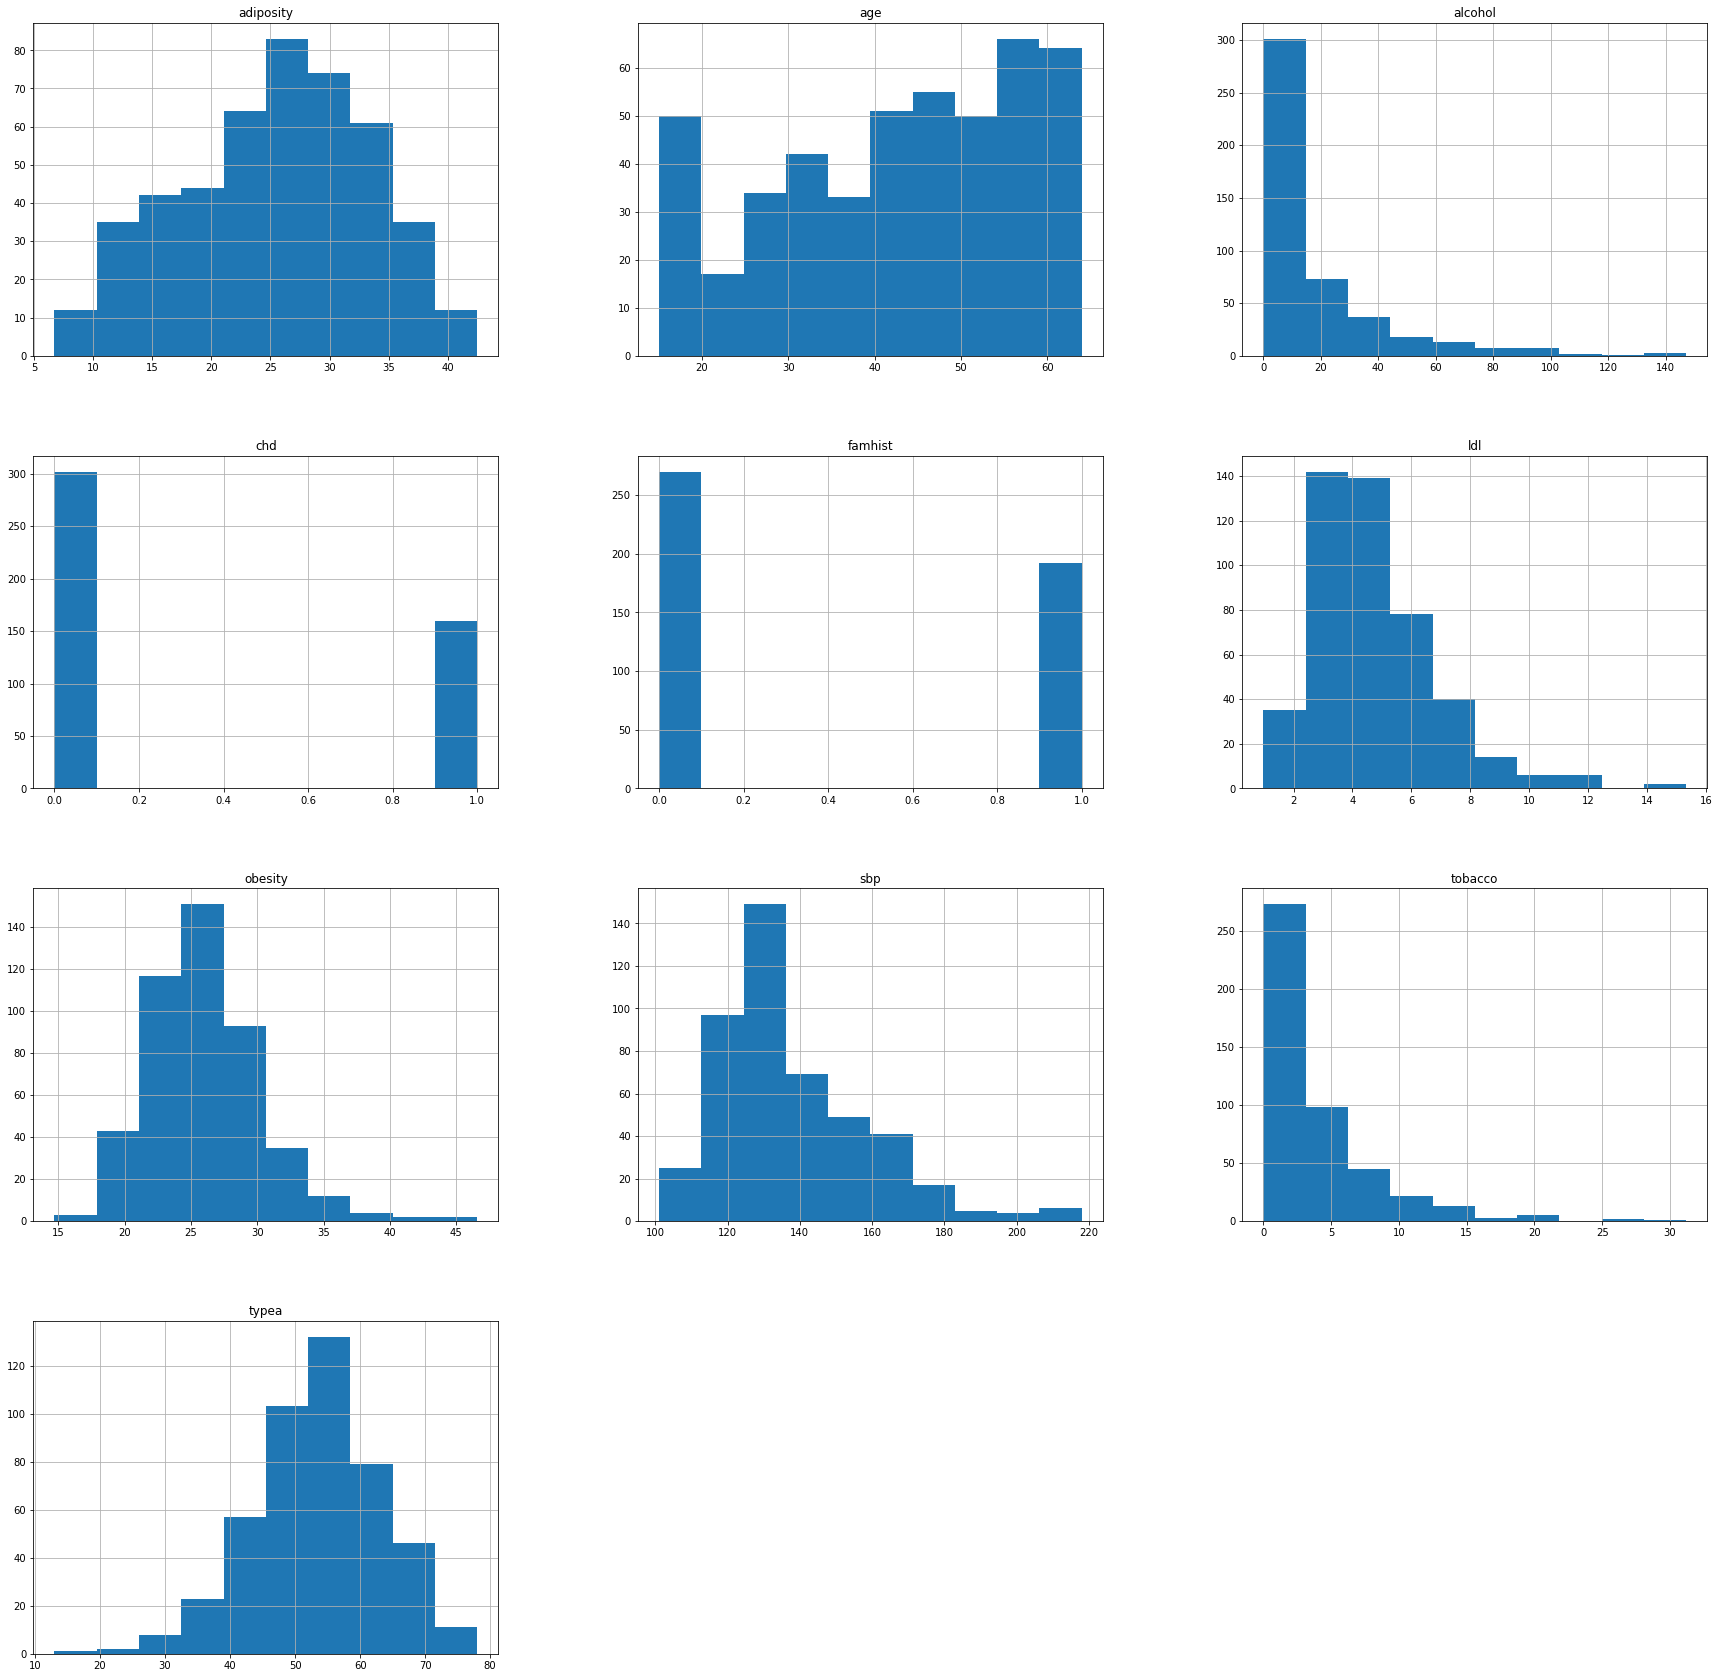

In [17]:
df.hist(figsize=(30,30))

korelacja pearsona nie jest użyteczna dla zmiennych kategorycznych dlatego do badania korelacji je usuniemy

In [18]:
df_subset = df.drop(['chd', 'famhist'], axis = 1)

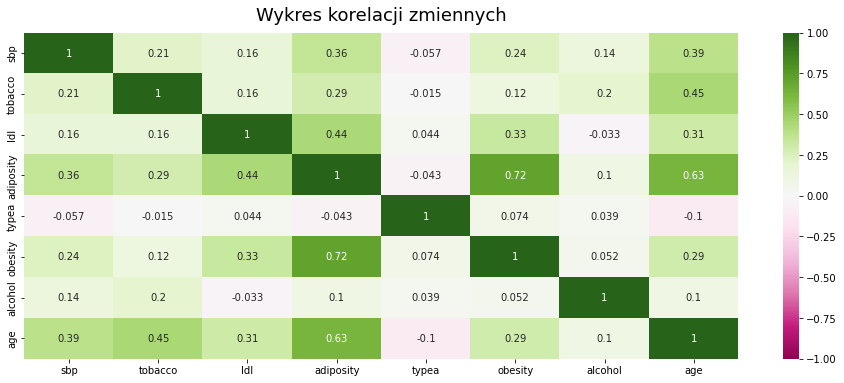

In [19]:
plt.figure(figsize=(16, 6))
heatmap=sns.heatmap(df_subset.corr(), vmin=-1, vmax=1, annot=True, cmap="PiYG");
heatmap.set_title('Wykres korelacji zmiennych', fontdict={'fontsize':18}, pad=12);

Do PCA róznież nie będziemy aplikować dwóch kolumn z wartościami binarnymi, które zostały wyrzucone wyżej


Przed PCA należy poddać dane standaryzacji, gdyż jeśli dane byłyby niewystandaryzowane PCA wybrałyby dane o dużej wariancji.
Poddamy teraz nasze dane standaryzacji tak jak zespół budujący

### Standaryzacja

In [20]:
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(df_subset.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df_subset.index, columns=df_subset.columns)
scaled_features_df

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
0,1.058564,1.823073,0.478412,-0.295503,-0.418470,-0.176786,3.277738,0.629336
1,0.277089,-0.790237,-0.159680,0.412140,0.193344,0.671373,-0.612745,1.383115
2,-0.992806,-0.774980,-0.609245,0.884332,-0.112563,0.735519,-0.541183,0.218184
3,1.546985,0.842264,0.807126,1.624141,-0.214532,1.412621,0.295062,1.040488
4,-0.211332,2.171805,-0.599577,0.305351,0.703189,-0.012856,1.647775,0.423760
...,...,...,...,...,...,...,...,...
457,3.696039,-0.705234,0.599263,0.812281,1.111065,0.571590,-0.696983,1.040488
458,2.133091,0.123004,-0.159680,0.861173,-0.112563,0.609602,0.068519,0.629336
459,-1.481228,-0.138545,-1.522877,-1.309364,-1.336191,-1.414575,0.392385,0.834912
460,-0.992806,0.384553,3.320823,0.692625,1.111065,0.310252,0.283203,-0.192969


In [29]:
scaled_features_df.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
count,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02
mean,-2.398274e-16,8.170472e-18,3.737841e-16,1.686962e-16,-1.684559e-16,6.046150e-16,3.102376e-16,6.728624e-18
std,1.001084e+00,1.001084e+00,1.001084e+00,1.001084e+00,1.001084e+00,1.001084e+00,1.001084e+00,1.001084e+00
min,-1.823123e+00,-7.924170e-01,-1.817753e+00,-2.401708e+00,-4.089354e+00,-2.695129e+00,-6.969825e-01,-1.906103e+00
25%,-6.997535e-01,-7.809742e-01,-7.047170e-01,-7.245926e-01,-6.224081e-01,-7.267824e-01,-6.761275e-01,-8.096968e-01
50%,-2.113321e-01,-3.565020e-01,-1.935182e-01,9.112757e-02,-1.059418e-02,-5.680824e-02,-3.898822e-01,1.496582e-01
75%,4.724579e-01,4.063492e-01,5.074164e-01,7.489145e-01,7.031887e-01,5.828745e-01,2.800340e-01,8.349118e-01
max,3.891408e+00,6.007857e+00,5.119082e+00,2.197976e+00,2.538631e+00,4.878906e+00,5.321938e+00,1.451640e+00


In [21]:
df_array = df_subset.values
df_array

array([[1.600e+02, 1.200e+01, 5.730e+00, ..., 2.530e+01, 9.720e+01,
        5.200e+01],
       [1.440e+02, 1.000e-02, 4.410e+00, ..., 2.887e+01, 2.060e+00,
        6.300e+01],
       [1.180e+02, 8.000e-02, 3.480e+00, ..., 2.914e+01, 3.810e+00,
        4.600e+01],
       ...,
       [1.080e+02, 3.000e+00, 1.590e+00, ..., 2.009e+01, 2.664e+01,
        5.500e+01],
       [1.180e+02, 5.400e+00, 1.161e+01, ..., 2.735e+01, 2.397e+01,
        4.000e+01],
       [1.320e+02, 0.000e+00, 4.820e+00, ..., 1.470e+01, 0.000e+00,
        4.600e+01]])

In [22]:
pca = PCA(random_state=42)
pca.fit(df_array)

PCA(random_state=42)

In [23]:
df_pca = pd.DataFrame({
    "principal_component": range(1, df_array.shape[1]+1),
    "explained_variance": pca.explained_variance_ratio_,
    "cumsum_explained_variance": pca.explained_variance_ratio_.cumsum(),
})
df_pca.loc[-1] = 0
df_pca.sort_values(by="principal_component", inplace=True)

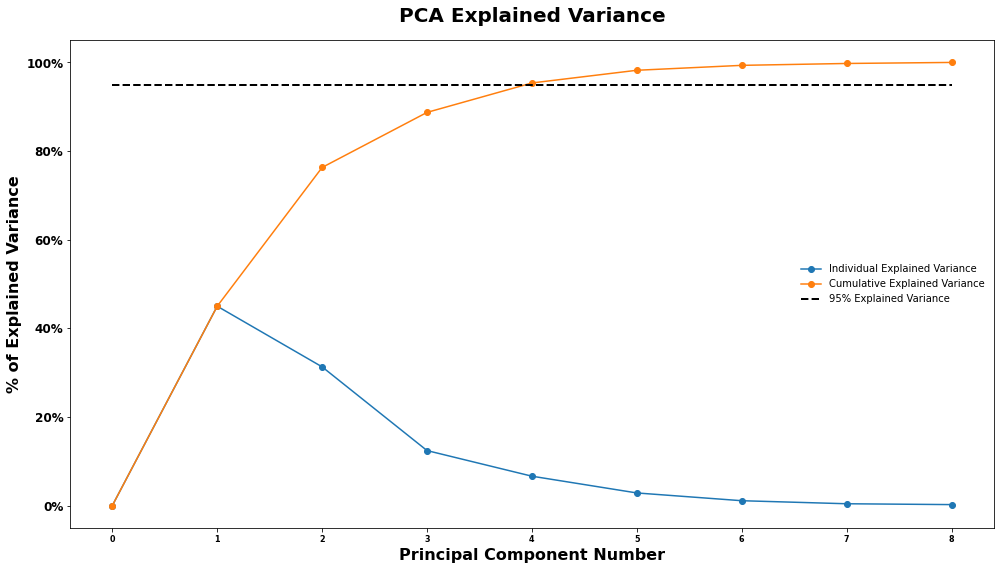

In [24]:
fig, ax = plt.subplots(figsize=(14, 8))
plt.plot(df_pca["principal_component"], df_pca["explained_variance"], marker="o", label="Individual Explained Variance")
plt.plot(df_pca["principal_component"], df_pca["cumsum_explained_variance"], marker="o", label="Cumulative Explained Variance")
plt.plot(df_pca["principal_component"], [0.95] * len(df_pca), color="black", linewidth=2, linestyle="--", label="95% Explained Variance")
ax.set_xticklabels(["{:,.0f}".format(x) for x in ax.get_xticks()])
ax.set_yticklabels(["{:,.0%}".format(x) for x in ax.get_yticks()])
plt.title("PCA Explained Variance", fontsize=20, fontweight="bold")
ax.title.set_position([.5, 1.025])
plt.xticks(range(0,9), range(0,9), fontsize=8, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold")
plt.xlabel("Principal Component Number", fontsize=16, fontweight="bold")
plt.ylabel("% of Explained Variance", fontsize=16, fontweight="bold")
plt.grid(False)
plt.legend(loc="best", frameon=False)
plt.tight_layout()
plt.show()

In [25]:
n_components_pca = int(df_pca["cumsum_explained_variance"].gt(0.95).idxmax())
print("# of Features Until 95% Variance is Reached:", n_components_pca)

# of Features Until 95% Variance is Reached: 3


Przez to, że wyrzuciliśmy dane binarne nasz wynik różni się od tego zespołu budującego. Uważamy, że przed wykonaniem PCA i standaryzacji powinni oni najpierw wyrzucić te dwie kolumny kategoryczne

### Wartości własne 


In [28]:
pca.explained_variance_

array([644.75373289, 448.64796278, 177.98512645,  95.16553734,
        41.00420415,  15.91784376,   6.08343001,   3.3479062 ])

### Wektory własne 

In [31]:
for eigenvector in pca.components_:
    print(eigenvector)

[4.14577754e-01 5.68332237e-02 6.41727645e-03 9.65900464e-02
 4.50050129e-04 3.08510258e-02 8.78507740e-01 2.06873427e-01]
[-0.77385425 -0.04182414 -0.02444811 -0.16374998  0.0548855  -0.05554214
  0.47591931 -0.37335244]
[ 0.47731205 -0.11530042 -0.03931792 -0.28936879  0.08932323 -0.07272719
  0.00816648 -0.81256646]
[ 0.00364037 -0.0229667  -0.02616799 -0.08363532 -0.99025946 -0.07846588
  0.02774899 -0.06510726]
[ 0.03753688  0.08934386 -0.08868681 -0.78733642  0.08257978 -0.48569693
 -0.00088143  0.3465876 ]
[-0.00417265  0.98622847  0.02228067  0.02714601 -0.01768084  0.01804381
 -0.02863756 -0.15698519]
[-0.00285615  0.01332336 -0.06872271 -0.48717693 -0.03190003  0.86498461
  0.0024458   0.09234818]
[ 5.12263188e-04 -1.98148898e-02  9.91990855e-01 -1.23086296e-01
 -1.56621528e-02  9.57518060e-03  7.83565424e-03 -3.55403634e-03]


Tak jak zostało wspomniane wcześniej przez zespół budujący wartości wektorów własnych określają współczynnik korelacji pomiędzy komponentami PCA a zmiennymi z wcześniejszego zbioru. Ujemne wartości oznaczają korelacje odwrotną, a wartości dodatnie mowią nam o korelacji dodatniej

In [35]:
corr_coef = pca.components_
num_pc = pca.n_features_
corr_coef_df = pd.DataFrame.from_dict(dict(zip(pc_names, corr_coef)))
corr_coef_df['zmienna'] = scaled_features_df.columns.values
corr_coef_df = corr_coef_df.set_index('zmienna')
corr_coef_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
zmienna,,,,,,,,
sbp,0.414578,-0.773854,0.477312,0.003640,0.037537,-0.004173,-0.002856,0.000512
tobacco,0.056833,-0.041824,-0.115300,-0.022967,0.089344,0.986228,0.013323,-0.019815
ldl,0.006417,-0.024448,-0.039318,-0.026168,-0.088687,0.022281,-0.068723,0.991991
adiposity,0.096590,-0.163750,-0.289369,-0.083635,-0.787336,0.027146,-0.487177,-0.123086
typea,0.000450,0.054885,0.089323,-0.990259,0.082580,-0.017681,-0.031900,-0.015662
obesity,0.030851,-0.055542,-0.072727,-0.078466,-0.485697,0.018044,0.864985,0.009575
alcohol,0.878508,0.475919,0.008166,0.027749,-0.000881,-0.028638,0.002446,0.007836
age,0.206873,-0.373352,-0.812566,-0.065107,0.346588,-0.156985,0.092348,-0.003554


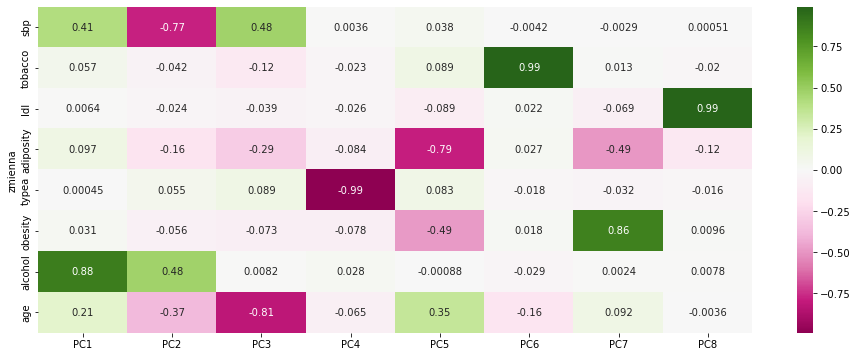

In [43]:
plt.figure(figsize=(16, 6))
ax = sns.heatmap(corr_coef_df, annot=True, cmap='PiYG')
plt.show()

### Biplot

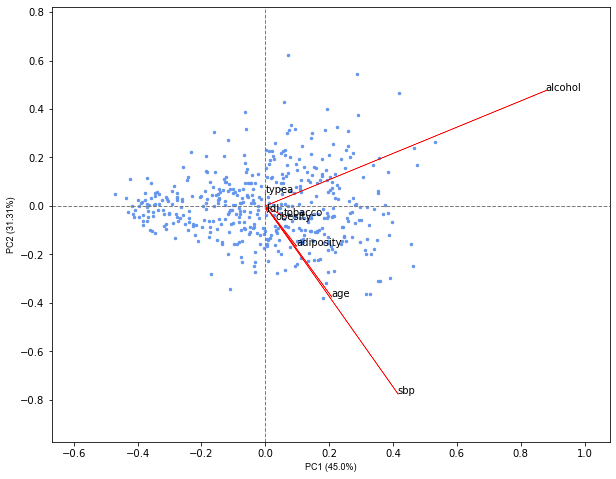

In [42]:
from bioinfokit.visuz import cluster
pca_sc= PCA().fit_transform(scaled_features_df)
cluster.biplot(cscore=pca_sc, loadings=corr_coef, labels=scaled_features_df.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2), colordot = 'cornflowerblue', show=True, arrowcolor= 'red', dim=(10,8))


Kąt nachylenia poszczególnych wektorów odpowiadających poszczególnym zmiennym ilustruje nam ich powiązanie (im kąt między wektorami mniejszy tym zmienne są mocniej ze sobą powiązane). Możemy zobaczyć, że zmienne `adiposity`, `age`, `sbp`, `obesity`

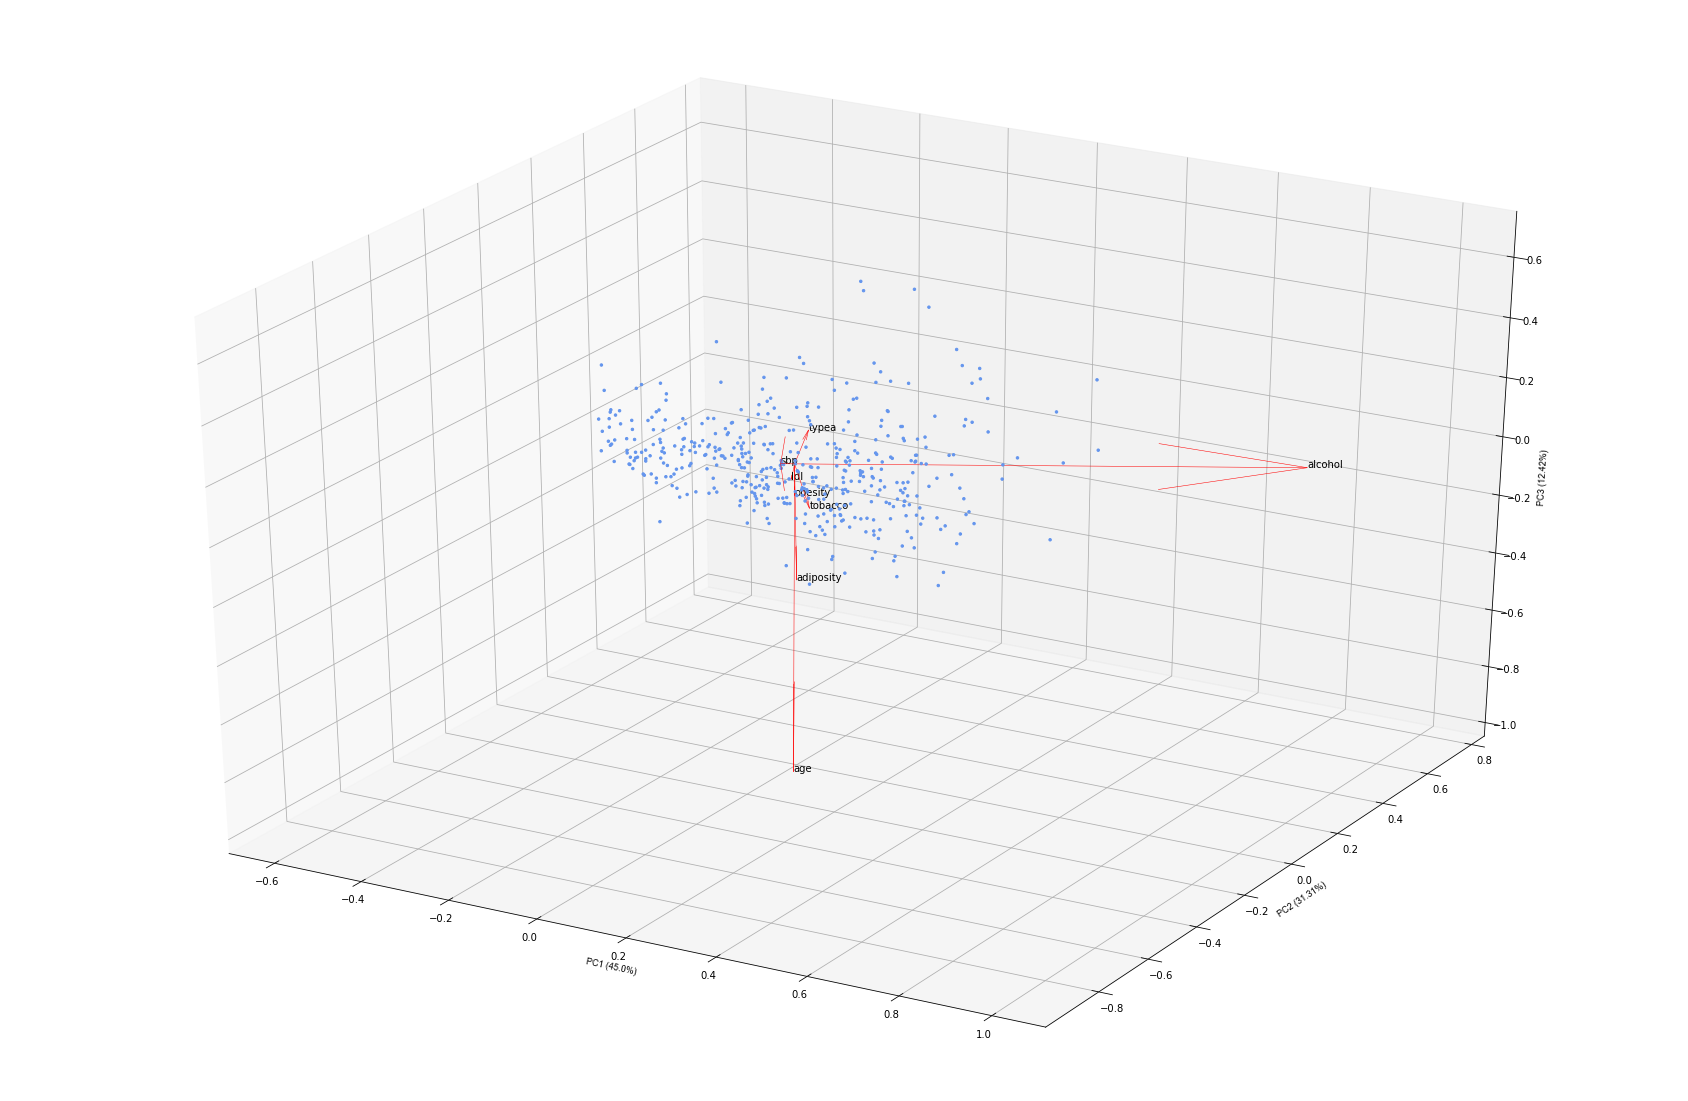

In [39]:
cluster.biplot(cscore=pca_sc, loadings=corr_coef, labels=scaled_features_df.columns.values, 
    var1=round(pca.explained_variance_ratio_[0]*100, 2), var2=round(pca.explained_variance_ratio_[1]*100, 2), 
    var3=round(pca.explained_variance_ratio_[2]*100, 2), colordot = 'cornflowerblue', show=True, arrowcolor= 'red',dim=(30,20))

Juz 3 komponenty PCA wyjasniają, aż 95% wariancji. Jest to zatem na tyle mała liczba iż warto byłoby zachować 3 te składowe, gdyż znacznie wnoszą one wyjaśnialność wariancji, a przy tym nie zwiększają one znacznie wymiaru danych (między wyjaśnialnością wariancji dla 70%+ otrzymaliśmy wynik 2 komponentów, a dla wyjaśnialności 95% tak jak zostało pokazane na wykresie tylko 3 komponenty) 